In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Onlineretail.csv',encoding= 'unicode_escape')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df=df[['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','Description','InvoiceDate','Country']]

In [6]:
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,WHITE HANGING HEART T-LIGHT HOLDER,12/1/2010 8:26,United Kingdom
1,17850.0,536365,71053,6,3.39,WHITE METAL LANTERN,12/1/2010 8:26,United Kingdom
2,17850.0,536365,84406B,8,2.75,CREAM CUPID HEARTS COAT HANGER,12/1/2010 8:26,United Kingdom
3,17850.0,536365,84029G,6,3.39,KNITTED UNION FLAG HOT WATER BOTTLE,12/1/2010 8:26,United Kingdom
4,17850.0,536365,84029E,6,3.39,RED WOOLLY HOTTIE WHITE HEART.,12/1/2010 8:26,United Kingdom


In [7]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [8]:
TotalAmt=df['Quantity']*df['UnitPrice']
df.insert(loc=5,column='Total',value=TotalAmt)

In [9]:
df.head()


,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Total,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,12/1/2010 8:26,United Kingdom
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,12/1/2010 8:26,United Kingdom
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,12/1/2010 8:26,United Kingdom
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,12/1/2010 8:26,United Kingdom
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,12/1/2010 8:26,United Kingdom


In [10]:
country_price=df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

In [11]:
country_price

Country
United Kingdom          4263829
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


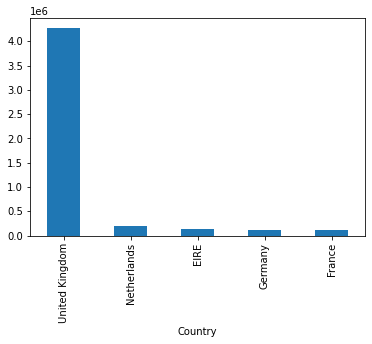

In [12]:
country_price[:5].plot(kind='bar')

In [13]:
time=pd.to_datetime(df['InvoiceDate'])

df['year'] = time.dt.year
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Total,Description,InvoiceDate,Country,year
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,12/1/2010 8:26,United Kingdom,2010
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,12/1/2010 8:26,United Kingdom,2010
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,12/1/2010 8:26,United Kingdom,2010
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,12/1/2010 8:26,United Kingdom,2010
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,12/1/2010 8:26,United Kingdom,2010


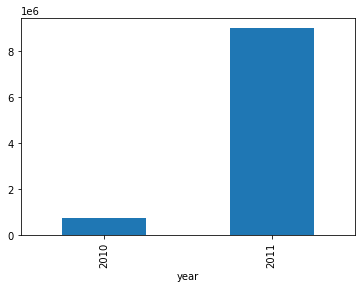

In [14]:
sales=df.groupby('year')['Total'].sum().plot(kind='bar')

In [15]:
new_df=df.copy()

In [16]:
new_df['month']=time.dt.month
new_df.groupby(['month','year'])['Total'].sum()

month  year
1      2011     560000.260
2      2011     498062.650
3      2011     683267.080
4      2011     493207.121
5      2011     723333.510
6      2011     691123.120
7      2011     681300.111
8      2011     682680.510
9      2011    1019687.622
10     2011    1070704.670
11     2011    1461756.250
12     2010     748957.020
       2011     433668.010
Name: Total, dtype: float64

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [18]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
df.shape


(541909, 10)

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   406829 non-null  float64
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   UnitPrice    541909 non-null  float64
 5   Total        541909 non-null  float64
 6   Description  540455 non-null  object 
 7   InvoiceDate  541909 non-null  object 
 8   Country      541909 non-null  object 
 9   year         541909 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 41.3+ MB


In [22]:
df.describe()


,CustomerID,Quantity,UnitPrice,Total,year
count,406829.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,15287.690570,9.552250,4.611114,17.987795,2010.921609
std,1713.600303,218.081158,96.759853,378.810824,0.268787
min,12346.000000,-80995.000000,-11062.060000,-168469.600000,2010.000000
25%,13953.000000,1.000000,1.250000,3.400000,2011.000000
50%,15152.000000,3.000000,2.080000,9.750000,2011.000000
75%,16791.000000,10.000000,4.130000,17.400000,2011.000000
max,18287.000000,80995.000000,38970.000000,168469.600000,2011.000000


In [23]:
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null


CustomerID     24.93
InvoiceNo       0.00
StockCode       0.00
Quantity        0.00
UnitPrice       0.00
Total           0.00
Description     0.27
InvoiceDate     0.00
Country         0.00
year            0.00
dtype: float64

In [24]:
df = df.dropna()
df.shape

(406829, 10)

In [25]:
df['CustomerID'] = df['CustomerID'].astype(str)


,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Total,Description,InvoiceDate,Country,year
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,12/1/2010 8:26,United Kingdom,2010
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,12/1/2010 8:26,United Kingdom,2010
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,12/1/2010 8:26,United Kingdom,2010
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,12/1/2010 8:26,United Kingdom,2010
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,12/1/2010 8:26,United Kingdom,2010
...,...,...,...,...,...,...,...,...,...,...
541904,12680.0,581587,22613,12,0.85,10.20,PACK OF 20 SPACEBOY NAPKINS,12/9/2011 12:50,France,2011
541905,12680.0,581587,22899,6,2.10,12.60,CHILDREN'S APRON DOLLY GIRL,12/9/2011 12:50,France,2011
541906,12680.0,581587,23254,4,4.15,16.60,CHILDRENS CUTLERY DOLLY GIRL,12/9/2011 12:50,France,2011
541907,12680.0,581587,23255,4,4.15,16.60,CHILDRENS CUTLERY CIRCUS PARADE,12/9/2011 12:50,France,2011


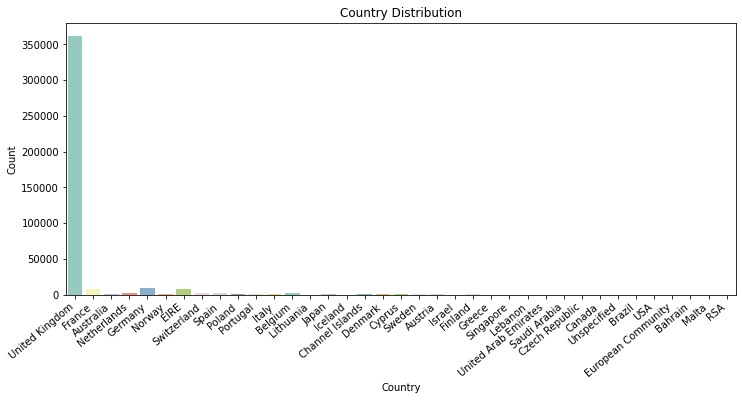

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(df['Country'],palette= 'Set3')
plt.xticks(rotation=40,ha='right')
plt.title("Country Distribution")
plt.xlabel('Country')
plt.ylabel('Count');

df

In [27]:
df['Totalamt']=df['Quantity']*df['UnitPrice']

In [28]:
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Total,Description,InvoiceDate,Country,year,Totalamt
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,12/1/2010 8:26,United Kingdom,2010,15.30
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,12/1/2010 8:26,United Kingdom,2010,20.34
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,12/1/2010 8:26,United Kingdom,2010,22.00
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,12/1/2010 8:26,United Kingdom,2010,20.34
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,12/1/2010 8:26,United Kingdom,2010,20.34


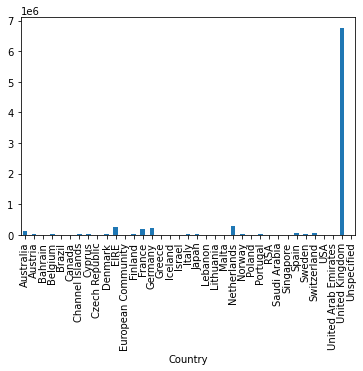

In [29]:
df.groupby(['Country'])['Totalamt'].sum().plot(kind='bar')

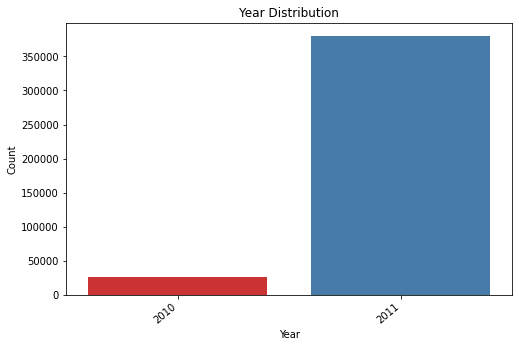

In [30]:
plt.figure(figsize=(8,5))
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
sns.countplot(df['InvoiceDate'].dt.year,palette= 'Set1')
plt.xticks(rotation=40,ha='right')
plt.title("Year Distribution")
plt.xlabel('Year')
plt.ylabel('Count');

Text(0.5, 0, 'Month')

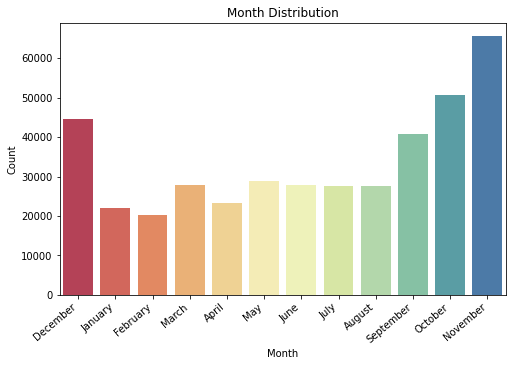

In [31]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=40,ha='right')
sns.countplot(df['InvoiceDate'].dt.month_name(),palette= 'Spectral')
plt.title("Month Distribution")
plt.ylabel('Count')
plt.xlabel('Month')

Text(0, 0.5, 'Count')

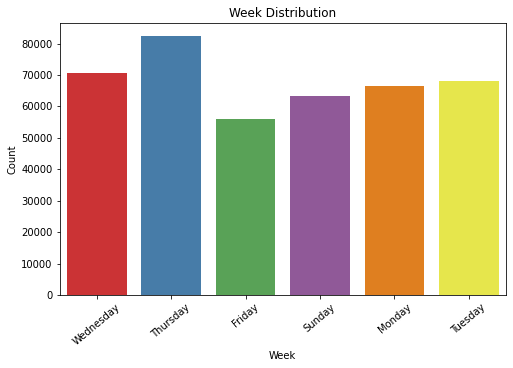

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(df['InvoiceDate'].dt.day_name(),palette= 'Set1')
plt.xticks(rotation=40)
plt.title("Week Distribution")
plt.xlabel('Week')
plt.ylabel('Count')

In [36]:
#Cleaning Data

In [33]:
rfm_m = df.groupby('CustomerID')['Totalamt'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Totalamt
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [34]:
rfm_f = df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [35]:
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Totalamt,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [37]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [38]:
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [39]:
df['Diff'] = max_date - df['InvoiceDate']
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Total,Description,InvoiceDate,Country,year,Totalamt,Diff
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,2010,15.30,373 days 04:24:00
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,2010,20.34,373 days 04:24:00
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,2010,22.00,373 days 04:24:00
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom,2010,20.34,373 days 04:24:00
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom,2010,20.34,373 days 04:24:00


In [40]:
rfm_p = df.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [41]:
rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [42]:
rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Text(0.5, 0, 'Attributes')

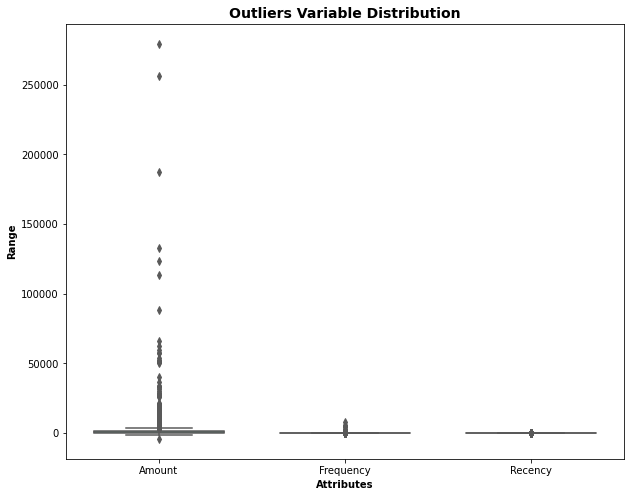

In [43]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [44]:
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [45]:
rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [46]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [47]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [48]:
kmeans.labels_


array([1, 0, 3, ..., 1, 3, 3], dtype=int32)

Text(0, 0.5, 'Intertia')

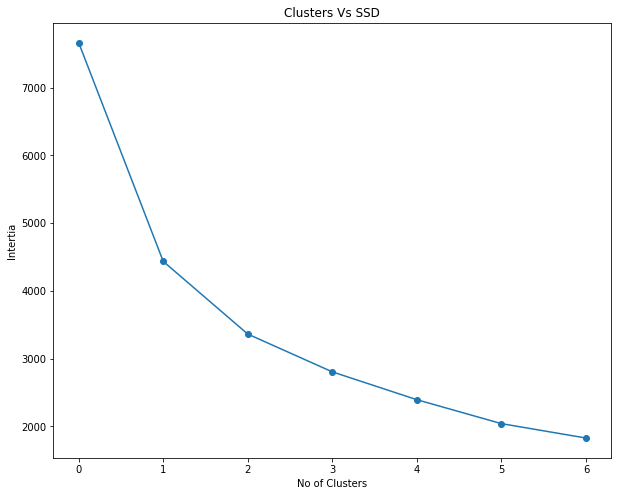

In [49]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd, marker='o')
plt.title('Clusters Vs SSD')
plt.xlabel('No of Clusters')
plt.ylabel('Intertia')

In [50]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5415858652525395
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.47943362518683813
For n_clusters=5, the silhouette score is 0.4657540393884596
For n_clusters=6, the silhouette score is 0.4171700614092766
For n_clusters=7, the silhouette score is 0.41756394820616693
For n_clusters=8, the silhouette score is 0.4123307658569919


In [55]:
df['CustomerID'].nunique()

4372

In [56]:
len(df['CustomerID'])

406829

In [57]:
df1=df[{'Description','CustomerID'}]

In [58]:
df1.head()

,Description,CustomerID
0,WHITE HANGING HEART T-LIGHT HOLDER,17850.0
1,WHITE METAL LANTERN,17850.0
2,CREAM CUPID HEARTS COAT HANGER,17850.0
3,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0
4,RED WOOLLY HOTTIE WHITE HEART.,17850.0


In [59]:
customer={}

for i in df['Description']:
  if(i in customer.keys()):
    customer[i] += 1
  else:
    customer[i] = 1

In [60]:
customer

{'WHITE HANGING HEART T-LIGHT HOLDER': 2070,
 'WHITE METAL LANTERN': 259,
 'CREAM CUPID HEARTS COAT HANGER': 250,
 'KNITTED UNION FLAG HOT WATER BOTTLE': 330,
 'RED WOOLLY HOTTIE WHITE HEART.': 333,
 'SET 7 BABUSHKA NESTING BOXES': 306,
 'GLASS STAR FROSTED T-LIGHT HOLDER': 129,
 'HAND WARMER UNION JACK': 477,
 'HAND WARMER RED POLKA DOT': 18,
 'ASSORTED COLOUR BIRD ORNAMENT': 1418,
 "POPPY'S PLAYHOUSE BEDROOM ": 329,
 "POPPY'S PLAYHOUSE KITCHEN": 360,
 'FELTCRAFT PRINCESS CHARLOTTE DOLL': 421,
 'IVORY KNITTED MUG COSY ': 53,
 'BOX OF 6 ASSORTED COLOUR TEASPOONS': 75,
 'BOX OF VINTAGE JIGSAW BLOCKS ': 226,
 'BOX OF VINTAGE ALPHABET BLOCKS': 236,
 'HOME BUILDING BLOCK WORD': 719,
 'LOVE BUILDING BLOCK WORD': 582,
 'RECIPE BOX WITH METAL HEART': 5,
 'DOORMAT NEW ENGLAND': 539,
 'JAM MAKING SET WITH JARS': 974,
 'RED COAT RACK PARIS FASHION': 97,
 'YELLOW COAT RACK PARIS FASHION': 93,
 'BLUE COAT RACK PARIS FASHION': 140,
 'BATH BUILDING BLOCK WORD': 257,
 'ALARM CLOCK BAKELIKE PINK': 638

In [61]:
product=list(customer.keys())
count=list(customer.values())

In [62]:
data={'product' : product,
      'count' : count}

In [63]:
df1=pd.DataFrame.from_dict(data)

In [64]:
df1.head()

,product,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2070
1,WHITE METAL LANTERN,259
2,CREAM CUPID HEARTS COAT HANGER,250
3,KNITTED UNION FLAG HOT WATER BOTTLE,330
4,RED WOOLLY HOTTIE WHITE HEART.,333


In [65]:
df1.sort_values(by=['count'],ascending=False)

,product,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2070
533,REGENCY CAKESTAND 3 TIER,1905
140,JUMBO BAG RED RETROSPOT,1662
9,ASSORTED COLOUR BIRD ORNAMENT,1418
1398,PARTY BUNTING,1416
...,...,...
3289,ANTIQUE RASPBERRY FLOWER EARRINGS,1
3736,"WALL ART,ONLY ONE PERSON",1
3292,GOLD/AMBER DROP EARRINGS W LEAF,1
2655,INCENSE BAZAAR PEACH,1


In [66]:
df.groupby('Description').agg(
    orders=('InvoiceNo', 'nunique'),
    quantity=('Quantity', 'sum')
).sort_values(by='orders', ascending=False).head(10)

,orders,quantity
Description,,
WHITE HANGING HEART T-LIGHT HOLDER,2013,34147
REGENCY CAKESTAND 3 TIER,1884,11555
JUMBO BAG RED RETROSPOT,1643,45066
PARTY BUNTING,1399,15027
ASSORTED COLOUR BIRD ORNAMENT,1385,35314
LUNCH BAG RED RETROSPOT,1329,17145
SET OF 3 CAKE TINS PANTRY DESIGN,1218,6864
POSTAGE,1194,3002
LUNCH BAG BLACK SKULL.,1073,11173


In [67]:
df_baskets = df[['InvoiceNo', 'StockCode', 'Description', 'Quantity']]
df_baskets.head()

,InvoiceNo,StockCode,Description,Quantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,71053,WHITE METAL LANTERN,6
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


In [68]:
df_items = df_baskets.pivot_table(index='InvoiceNo', columns=['Description'], values='Quantity').fillna(0)
df_items.head(3)

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
def get_recommendations(df, item):
    """Generate a set of product recommendations using item-based collaborative filtering.
    
    Args:
        df (dataframe): Pandas dataframe containing matrix of items purchased.
        item (string): Column name for target item. 
        
    Returns: 
        recommendations (dataframe): Pandas dataframe containing product recommendations. 
    """
    
    recommendations = df.corrwith(df[item])
    recommendations.dropna(inplace=True)
    recommendations = pd.DataFrame(recommendations, columns=['correlation']).reset_index()
    recommendations = recommendations.sort_values(by='correlation', ascending=False)
    
    return recommendations

In [70]:
recommendations = get_recommendations(df_items, 'WHITE HANGING HEART T-LIGHT HOLDER')
recommendations.head()

,Description,correlation
3716,WHITE HANGING HEART T-LIGHT HOLDER,1.000000
1396,GIN + TONIC DIET METAL SIGN,0.825321
1168,FAIRY CAKE FLANNEL ASSORTED COLOUR,0.821271
1018,DOORMAT FAIRY CAKE,0.483746
3436,TEA TIME PARTY BUNTING,0.469531


In [ ]:
recommendations = get_recommendations(df_items, 'PARTY BUNTING')
recommendations.head()

,Description,correlation
2355,PARTY BUNTING,1.000000
3338,SPOTTY BUNTING,0.258734
33,18PC WOODEN CUTLERY SET DISPOSABLE,0.178650
110,6PC WOOD PLATE SET DISPOSABLE,0.169431
3376,STRAWBERRY RAFFIA FOOD COVER,0.134040


In [71]:
recommendations = get_recommendations(df_items, 'LETTER "M" BLING KEY RING')
recommendations.head()

,Description,correlation
1900,"LETTER ""M"" BLING KEY RING",1.000000
1895,"LETTER ""H"" BLING KEY RING",0.873071
1897,"LETTER ""J"" BLING KEY RING",0.871016
1908,"LETTER ""V"" BLING KEY RING",0.789548
1906,"LETTER ""T"" BLING KEY RING",0.789536


In [72]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [73]:
kmeans.labels_

array([1, 0, 3, ..., 1, 3, 3], dtype=int32)

In [74]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [75]:
 kmeans.labels_


array([1, 2, 0, ..., 1, 0, 0], dtype=int32)

In [76]:
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


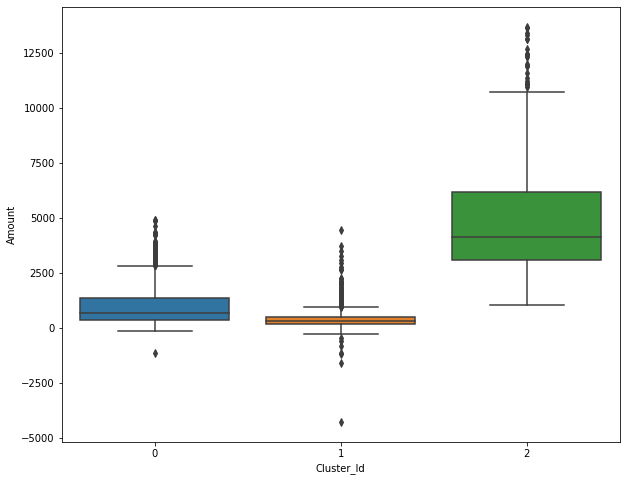

In [77]:
sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)


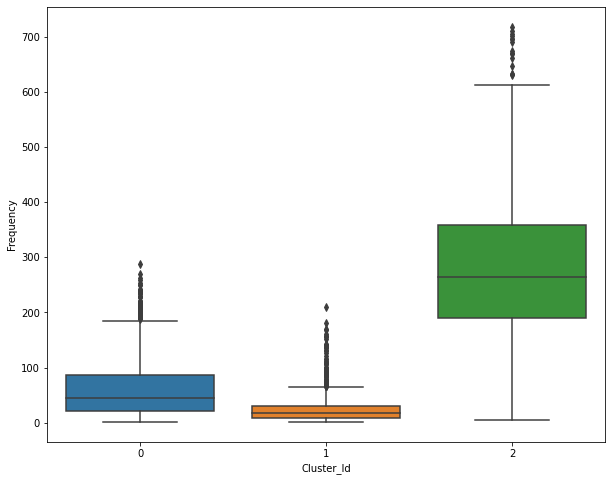

In [78]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

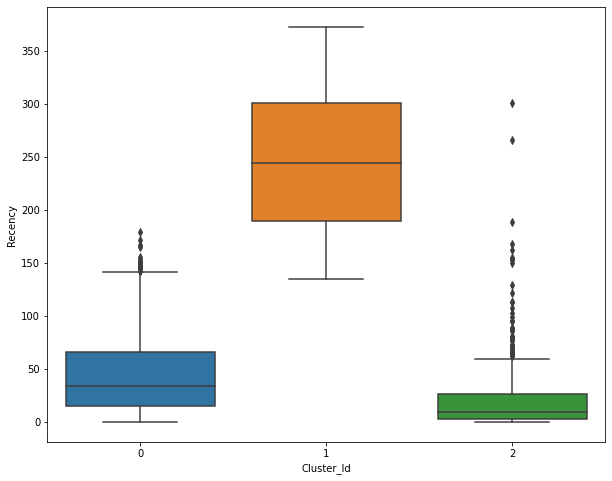

In [79]:
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

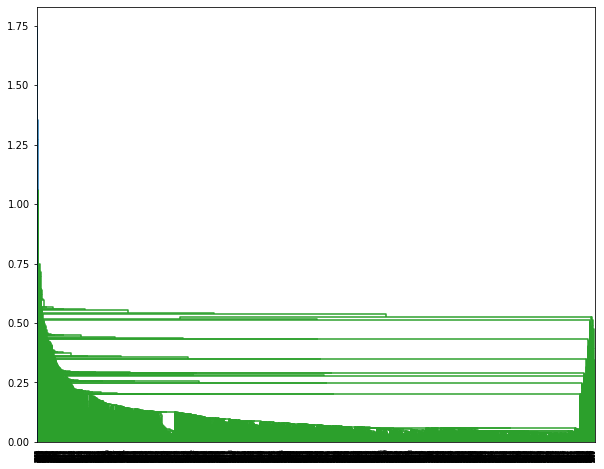

In [80]:
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

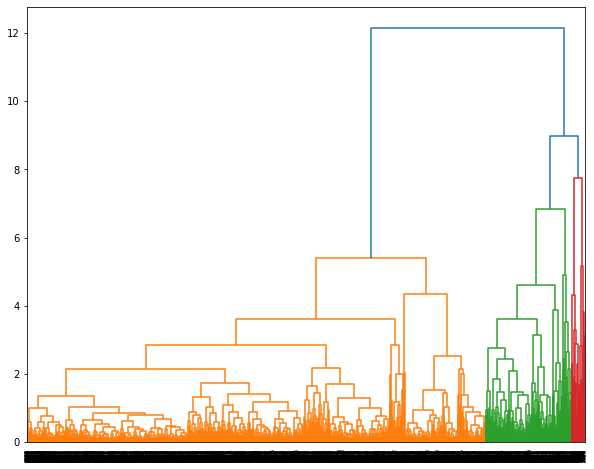

In [81]:
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()